In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asxmining/AMC.AX.csv
/kaggle/input/asxmining/RIO.AX.csv
/kaggle/input/asxmining/BHP.AX.csv
/kaggle/input/asxmining/NST.AX.csv
/kaggle/input/asxmining/NCM.AX.csv
/kaggle/input/asxmining/PLS.AX (1).csv
/kaggle/input/asxmining/MIN.AX.csv
/kaggle/input/asxmining/JHX.AX.csv
/kaggle/input/asxmining/FMG.AX.csv
/kaggle/input/asxmining/S32.AX.csv


In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bhp = pd.read_csv('/kaggle/input/asxmining/BHP.AX.csv')
fmg = pd.read_csv('/kaggle/input/asxmining/FMG.AX.csv')
rio = pd.read_csv('/kaggle/input/asxmining/RIO.AX.csv')
ncm = pd.read_csv('/kaggle/input/asxmining/NCM.AX.csv')
s32 = pd.read_csv('/kaggle/input/asxmining/S32.AX.csv')
dfmin = pd.read_csv('/kaggle/input/asxmining/MIN.AX.csv')
jhx = pd.read_csv('/kaggle/input/asxmining/JHX.AX.csv')
nst = pd.read_csv('/kaggle/input/asxmining/NST.AX.csv')
amc = pd.read_csv('/kaggle/input/asxmining/AMC.AX.csv')
pls = pd.read_csv('/kaggle/input/asxmining/PLS.AX (1).csv')


In [5]:
bhp.insert(7, 'Symbol', 'BHP')
fmg.insert(7, 'Symbol', 'FMG')
rio.insert(7, 'Symbol', 'RIO')
ncm.insert(7, 'Symbol', 'NCM')
s32.insert(7, 'Symbol', 'S32')
dfmin.insert(7, 'Symbol', 'MIN')
jhx.insert(7, 'Symbol', 'JHX')
nst.insert(7, 'Symbol', 'NST')
amc.insert(7, 'Symbol', 'AMC')
pls.insert(7, 'Symbol', 'PLS')

In [6]:
mining_combine1 = pd.concat([bhp, fmg, rio, ncm, s32, dfmin, jhx, nst, amc, pls], 
                           axis=0)
mining_select = mining_combine1.loc[:,["Date", "Close", "Symbol"]]

mining_pivot = pd.pivot_table(mining_select, index='Date',
                                  columns='Symbol',
                                  values='Close')
mining_pivot.head()

Symbol,AMC,BHP,FMG,JHX,MIN,NCM,NST,PLS,RIO,S32
Date,,,,,,,,,,
2020-01-01,15.89,39.400002,11.39,31.799999,17.059999,29.530001,12.60,0.295000,98.769997,2.640
2020-02-01,14.42,33.599998,10.08,28.230000,16.549999,26.299999,13.46,0.232890,87.269997,2.220
2020-03-01,13.04,28.980000,10.00,18.520000,13.970000,23.049999,10.53,0.158365,84.570000,1.765
2020-04-01,14.07,32.349998,11.96,22.420000,16.780001,27.540001,12.79,0.204943,87.510002,1.985
2020-05-01,14.88,34.639999,13.90,25.950001,18.809999,30.580000,14.80,0.242206,93.400002,1.910


<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

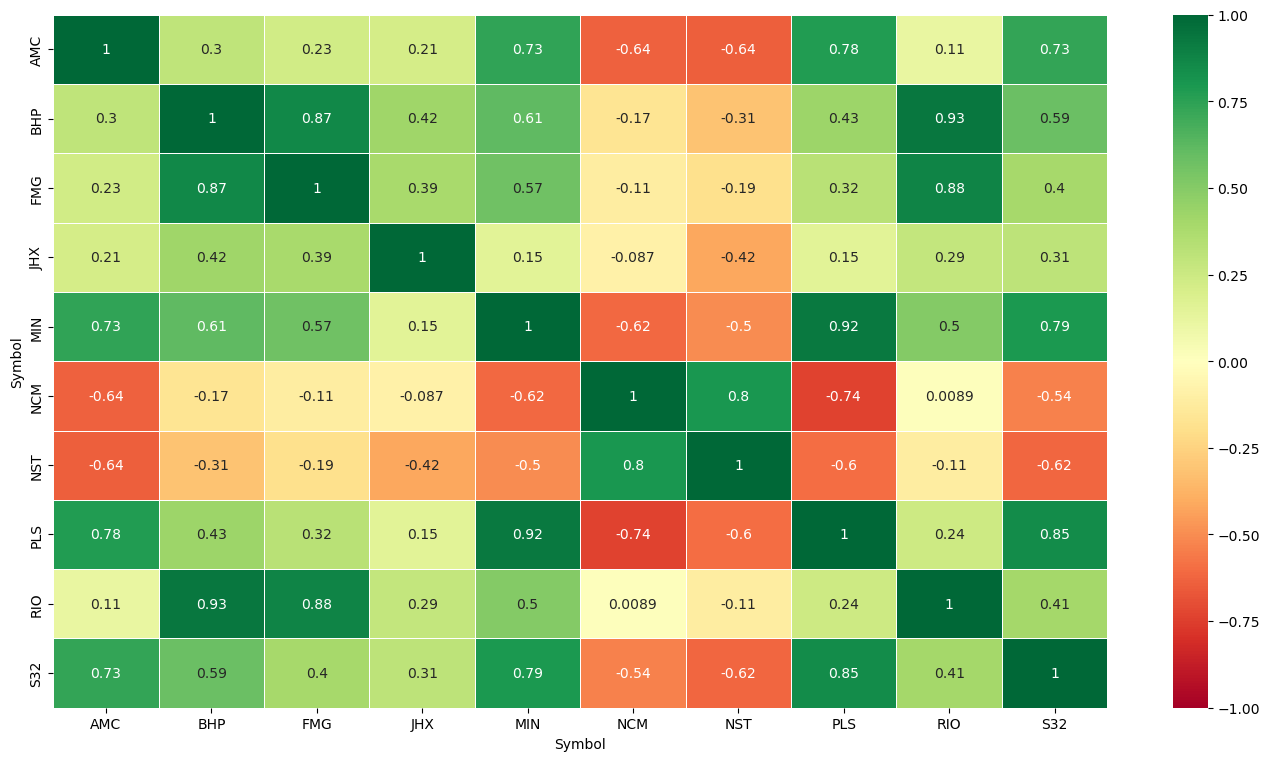

In [7]:
mining_corr = mining_pivot.corr(method='pearson')

plt.figure(figsize = (17,9))
sns.heatmap(mining_corr, cmap='RdYlGn', 
                vmax=1.0, vmin=-1.0 , 
                linewidths=.5, 
                annot=True)